In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from math import ceil
import seaborn as sns


In [110]:
#Define paths 

csv_path = os.path.abspath(
    os.path.join("..", "data", "interim", "05_-_Antioquia_2021_clean.csv")
)
csv_clean_path = os.path.abspath(
    os.path.join("..", "data", "processed", "05_-_Antioquia_2021_processed.csv")
)


In [111]:
# Read Csv
df = pd.read_csv(csv_path)
df.head()

,a_o,tipoatencion,numeroatenciones,codigo_departamento,nombre_departamento,codigo_municipio,nombre_municipio,codigo_diagnostico,n_diagnostico
0,2021,CONSULTAS,1,5,Antioquia,5501,Olaya,E02X,HIPOTIROIDISMO SUBCLINICO POR DEFICIENCIA DE YODO
1,2021,CONSULTAS,1,5,Antioquia,5501,Olaya,F069,TRASTORNO MENTAL NO ESPECIFICADO DEBIDO A LESI...
2,2021,CONSULTAS,1,5,Antioquia,5501,Olaya,F412,TRASTORNO MIXTO DE ANSIEDAD Y DEPRESION
3,2021,CONSULTAS,1,5,Antioquia,5501,Olaya,F510,INSOMNIO NO ORGANICO
4,2021,CONSULTAS,1,5,Antioquia,5501,Olaya,F529,"DISFUNCION SEXUAL, NO OCASIONADA POR TRASTORNO..."


In [112]:
df.shape

(395047, 9)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395047 entries, 0 to 395046
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   a_o                  395047 non-null  int64 
 1   tipoatencion         395047 non-null  object
 2   numeroatenciones     395047 non-null  int64 
 3   codigo_departamento  395047 non-null  int64 
 4   nombre_departamento  395047 non-null  object
 5   codigo_municipio     395047 non-null  int64 
 6   nombre_municipio     395047 non-null  object
 7   codigo_diagnostico   395047 non-null  object
 8   n_diagnostico        395047 non-null  object
dtypes: int64(4), object(5)
memory usage: 27.1+ MB


In [114]:
# Evaluating nulls in df

df.isna().sum().sort_values(ascending = False)

a_o                    0
tipoatencion           0
numeroatenciones       0
codigo_departamento    0
nombre_departamento    0
codigo_municipio       0
nombre_municipio       0
codigo_diagnostico     0
n_diagnostico          0
dtype: int64

In [115]:
# Detect strings out of ASCII range (basics) - Municipio
mask_non_ascii = df['nombre_municipio'].apply(lambda x: any(ord(c) > 127 for c in str(x)))
errors_non_ascii = df[mask_non_ascii]

print("Entries with non-ASCII characters:")
print(errors_non_ascii['nombre_municipio'].unique())

df['nombre_municipio'] = df['nombre_municipio'].str.replace('A¡', 'a', regex=False)

print(sorted(df['nombre_municipio'].unique()))

Entries with non-ASCII characters:
['San Juan De UrabA¡' 'Santa BA¡rbara' 'CocornA¡' 'CA¡ceres' 'BuriticA¡'
 'MutatA¡' 'TarazA¡' 'TA¡mesis' 'SopetrA¡n' 'AmagA¡']
['Abejorral', 'Abriaqui', 'Alejandria', 'Amaga', 'Amalfi', 'Andes', 'Angelopolis', 'Angostura', 'Anori', 'Anza', 'Apartado', 'Arboletes', 'Argelia', 'Armenia', 'Barbosa', 'Bello', 'Belmira', 'Betania', 'Betulia', 'Briceno', 'Buritica', 'Caceres', 'Caicedo', 'Caldas', 'Campamento', 'Canasgordas', 'Caracoli', 'Caramanta', 'Carepa', 'Carolina', 'Caucasia', 'Chigorodo', 'Cisneros', 'Ciudad Bolivar', 'Cocorna', 'Concepcion', 'Concordia', 'Copacabana', 'Dabeiba', 'Don Matias', 'Ebejico', 'El Bagre', 'El Carmen De Viboral', 'El Santuario', 'Entrerrios', 'Envigado', 'Fredonia', 'Frontino', 'Giraldo', 'Girardota', 'Gomez Plata', 'Granada', 'Guadalupe', 'Guarne', 'Guatape', 'Heliconia', 'Hispania', 'Itagui', 'Ituango', 'Jardin', 'Jerico', 'La Ceja', 'La Estrella', 'La Pintada', 'La Union', 'Liborina', 'Maceo', 'Marinilla', 'Medellin', '

In [116]:
# Detect strings out of ASCII range (basics) - Diagnostico

mask_non_ascii = df['n_diagnostico'].apply(lambda x: any(ord(c) > 127 for c in str(x)))
errores_non_ascii = df[mask_non_ascii]
print("Entries with non-ASCII characters:")
print(errores_non_ascii['n_diagnostico'].unique())

df['n_diagnostico'] = df['n_diagnostico'].str.replace(r'\s*\([^)]*\)', '', regex=True).str.strip()
print(sorted(df['n_diagnostico'].unique()))


Entries with non-ASCII characters:
['DEMENCIA EN LA ENFERMEDAD DE ALZHEIMER, ATIPICA O DE TIPO MIXTO (G30.8†)'
 'SINDROME SECO  SJA–GREN '
 'RETINOPATIA DIABETICA (E10-E14† CON CUARTO CARACTER COMUN .3)'
 'BURSITIS GONOCOCICA (A54.4†)'
 'DEMENCIA EN LA ENFERMEDAD DE PARKINSON (G20†)'
 'EXOFTALMIA HIPERTIROIDEA (E05.-†)'
 'QUERATITIS Y QUERATOCONJUNTIVITIS POR HERPES SIMPLE (B00.5†)'
 'DEMENCIA EN LA ENFERMEDAD DE ALZHEIMER, DE COMIENZO TEMPRANO (G30.0†)'
 'ARTROPATIA PSORIASICA INTERFALANGICA DISTAL (L40.5†)'
 'OSTEITIS DEFORMANTE EN ENFERMEDAD NEOPLASICA (C00-D48†)'
 'FRACTURA OSEA EN ENFERMEDAD NEOPLASICA (C00-D48†)'
 'LITIASIS URINARIA EN ESQUISTOSOMIASIS  BILHARZIASIS  (B65.-†)'
 'DEMENCIA EN LA ENFERMEDAD DE ALZHEIMER, DE COMIENZO TARDIO (G30.1†)'
 'OTROS SINDROMES VASCULARES ENCEFALICOS EN ENFERMEDADES CEREBROVASCULARES (I60-I67†)'
 'COMPRESIONES DE LAS RAICES Y PLEXOS NERVIOSOS EN TRASTORNOS DE LOS DISCOS INTERVERTEBRALES (M50-M51†)'
 'ANEMIA EN ENFERMEDAD NEOPLASICA (C00-D48†)'

In [117]:
#Evaluating duplicate rows

duplicados = df.duplicated().sum()
print(f'Filas duplicadas: {duplicados}')
df = df.drop_duplicates()
print(df.shape)

Filas duplicadas: 116773
(278274, 9)


In [118]:
#Evaluating numeroatenciones, searching for outliers 

print(df['numeroatenciones'].describe())

count    2.782740e+05
mean     7.792001e+01
std      6.585246e+03
min      1.000000e+00
25%      1.000000e+00
50%      3.000000e+00
75%      9.000000e+00
max      3.252558e+06
Name: numeroatenciones, dtype: float64


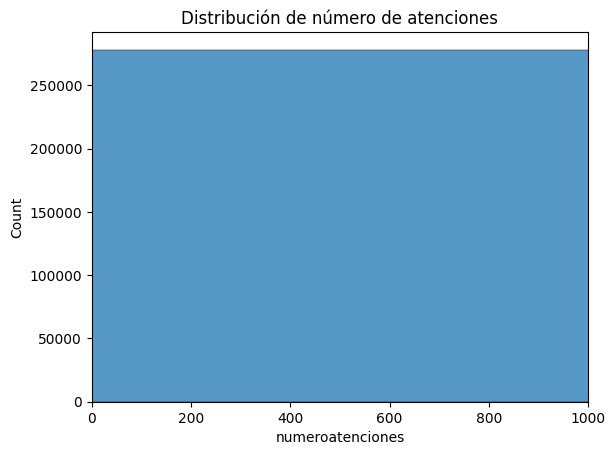

       nombre_municipio                                      n_diagnostico  \
118471         Medellin                                        NO DEFINIDO   
206868         Medellin                      OTRAS CONSULTAS ESPECIFICADAS   
139614         Medellin                              HIPERTENSION ESENCIAL   
118210         Medellin                    COVID-19, VIRUS NO IDENTIFICADO   
31954          Medellin                               CARIES DE LA DENTINA   
215632            Bello                      OTRAS CONSULTAS ESPECIFICADAS   
204870         Medellin                           OTROS EXAMENES GENERALES   
31345          Medellin                       COVID-19, VIRUS IDENTIFICADO   
330520            Bello  OTROS SINTOMAS Y SIGNOS QUE INVOLUCRAN LAS SEN...   
32535          Medellin                      EXAMEN DE OJOS Y DE LA VISION   

        numeroatenciones  
118471           3252558  
206868            861845  
139614            568924  
118210            231205  
31954 

In [119]:
sns.histplot(df['numeroatenciones'], bins=100)
plt.xlim(0, 1000)  # Zoom para ver valores bajos
plt.title("Distribución de número de atenciones")
plt.show()

# Ver top 10 más altos
print(df[['nombre_municipio', 'n_diagnostico', 'numeroatenciones']].sort_values(by='numeroatenciones', ascending=False).head(10))


These are not outliers; a very large number of medical services rendered is expected in larger cities like Medellín compared to smaller towns.

In [120]:
df.to_csv(csv_clean_path, index=False, encoding='utf-8')
print(f"\n✅ Processed file saved at:\n{csv_clean_path}")


✅ Processed file saved at:
/home/ym0r4l3s/projects/RIPS_Project/rips_project/data/processed/05_-_Antioquia_2021_processed.csv
